In [64]:
import pandas as pd

In [65]:
dataset = pd.read_csv('apartmentsdata.csv')

In [66]:
dataset.head()

,area,city,floor,location,price,rooms,source,square_price,title,Unnamed: 9,Unnamed: 10
0,76,Beograd,3,"Opština Vračar , Hram svetog Save , Svetog Save",290000,2.0,halooglasi,3816,"Plato Hrama Svetog Save, Vračar, 76m2",NaN,NaN
1,41,Vrnjačka Banja,2,"Gradska lokacija , Raj , Kosovska br.1",82000,2.0,halooglasi,2000,Lux stan Akva Park Raj,NaN,NaN
2,37,Sokobanja,1,"Gradska lokacija , Banjica , Profesora Dragol...",60605,2.0,halooglasi,1650,Direktna prodaja stana u Sokobanji,NaN,NaN
3,34,Sokobanja,3,"Gradska lokacija , Banjica , Profesora Dragol...",59488,1.5,halooglasi,1760,Direktna prodaja stana Sokobanja,NaN,NaN
4,55,Beograd,2,"Opština Zemun , Altina , Ugrinovački put 8. deo",104500,2.0,halooglasi,1900,"Zemun, Altina, 2.0",NaN,NaN


In [67]:
for i,loc in enumerate(dataset['location']):
    print(loc)
    if i==5:
        break

 Opština Vračar , Hram svetog Save , Svetog Save 
 Gradska lokacija , Raj , Kosovska br.1 
 Gradska lokacija , Banjica , Profesora Dragoljuba Jovanovića 
 Gradska lokacija , Banjica , Profesora Dragoljuba Jovanovića 
 Opština Zemun , Altina , Ugrinovački put 8. deo 
 Okolno mesto , Brzeće , Mramorska88 


In [68]:
location_split = dataset['location'].str.split(',', expand=True)

In [69]:
dataset['opstina'] = location_split[0].str.strip() 
dataset['naselje'] = location_split[1].str.strip()
dataset['ulica'] = location_split[2].str.strip()

dataset[['location', 'opstina', 'naselje', 'ulica']].head()

,location,opstina,naselje,ulica
0,"Opština Vračar , Hram svetog Save , Svetog Save",Opština Vračar,Hram svetog Save,Svetog Save
1,"Gradska lokacija , Raj , Kosovska br.1",Gradska lokacija,Raj,Kosovska br.1
2,"Gradska lokacija , Banjica , Profesora Dragol...",Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
3,"Gradska lokacija , Banjica , Profesora Dragol...",Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
4,"Opština Zemun , Altina , Ugrinovački put 8. deo",Opština Zemun,Altina,Ugrinovački put 8. deo


In [70]:
dataset.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)

In [71]:
dataset.rename(columns={
    'opstina': 'municipality',
    'naselje': 'neighborhood',
    'ulica': 'street'
}, inplace=True)

In [72]:
dataset.head()

,area,city,floor,location,price,rooms,source,square_price,title,municipality,neighborhood,street
0,76,Beograd,3,"Opština Vračar , Hram svetog Save , Svetog Save",290000,2.0,halooglasi,3816,"Plato Hrama Svetog Save, Vračar, 76m2",Opština Vračar,Hram svetog Save,Svetog Save
1,41,Vrnjačka Banja,2,"Gradska lokacija , Raj , Kosovska br.1",82000,2.0,halooglasi,2000,Lux stan Akva Park Raj,Gradska lokacija,Raj,Kosovska br.1
2,37,Sokobanja,1,"Gradska lokacija , Banjica , Profesora Dragol...",60605,2.0,halooglasi,1650,Direktna prodaja stana u Sokobanji,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
3,34,Sokobanja,3,"Gradska lokacija , Banjica , Profesora Dragol...",59488,1.5,halooglasi,1760,Direktna prodaja stana Sokobanja,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
4,55,Beograd,2,"Opština Zemun , Altina , Ugrinovački put 8. deo",104500,2.0,halooglasi,1900,"Zemun, Altina, 2.0",Opština Zemun,Altina,Ugrinovački put 8. deo


In [73]:
dataset.drop('location', axis=1, inplace=True)

In [74]:
# we don't need title and source, so we can drop them
dataset.drop(['title', 'source'], axis=1, inplace=True)

In [75]:
dataset.head()

,area,city,floor,price,rooms,square_price,municipality,neighborhood,street
0,76,Beograd,3,290000,2.0,3816,Opština Vračar,Hram svetog Save,Svetog Save
1,41,Vrnjačka Banja,2,82000,2.0,2000,Gradska lokacija,Raj,Kosovska br.1
2,37,Sokobanja,1,60605,2.0,1650,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
3,34,Sokobanja,3,59488,1.5,1760,Gradska lokacija,Banjica,Profesora Dragoljuba Jovanovića
4,55,Beograd,2,104500,2.0,1900,Opština Zemun,Altina,Ugrinovački put 8. deo


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          11704 non-null  int64  
 1   city          11704 non-null  object 
 2   floor         11586 non-null  object 
 3   price         11704 non-null  int64  
 4   rooms         11704 non-null  float64
 5   square_price  11704 non-null  int64  
 6   municipality  11704 non-null  object 
 7   neighborhood  11265 non-null  object 
 8   street        8967 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 823.1+ KB


In [77]:
for col in dataset.columns:
    if dataset[col].isna().any():
        print(col)

floor
neighborhood
street


In [78]:
# NaN values in column neighborhood can be replaced with values in municipality
dataset['neighborhood'] = dataset['municipality'].fillna(dataset['municipality'])

In [79]:
dataset['floor'].unique()

array(['3', '2', '1', '4', '0', '9', '6', '5', '0.5', '11', 'p', '7',
       '15', '-0.5', '8', '16', '10', '17', '25', '18', '12', '14', '23',
       '29', '27', '13', '19', '26', '20', '24', '22', nan], dtype=object)

In [80]:
dataset['floor'] = dataset['floor'].replace('p', 0)
dataset['floor'] = dataset['floor'].astype(float).abs()

In [81]:
for i, (city, group) in enumerate(dataset.groupby('neighborhood')['floor']):
    if i==3:
        break
    print("=" * 40)
    print(f"Grad: {city} ({len(group)} redova)")
    print("=" * 40)
    print(group.to_string(index=False))

Grad: 25. Maj (1 redova)
5.0
Grad: 4. Juli (3 redova)
4.0
1.0
3.0
Grad: A Blok - Blok 67a (1 redova)
2.0


In [82]:
dataset['neighborhood'].isna().any()

np.False_

In [83]:
city_median_floor = dataset.groupby('city')['floor'].transform('median')

def fill_floor(x):
    if x.notna().any():
        return x.fillna(x.median())
    else:
        return x.fillna(city_median_floor[x.index])

dataset['floor'] = dataset.groupby('neighborhood')['floor'].transform(fill_floor)

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          11704 non-null  int64  
 1   city          11704 non-null  object 
 2   floor         11704 non-null  float64
 3   price         11704 non-null  int64  
 4   rooms         11704 non-null  float64
 5   square_price  11704 non-null  int64  
 6   municipality  11704 non-null  object 
 7   neighborhood  11704 non-null  object 
 8   street        8967 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 823.1+ KB


In [86]:
dataset.drop('street', axis=1, inplace=True)

In [87]:
dataset.head()

,area,city,floor,price,rooms,square_price,municipality,neighborhood
0,76,Beograd,3.0,290000,2.0,3816,Opština Vračar,Opština Vračar
1,41,Vrnjačka Banja,2.0,82000,2.0,2000,Gradska lokacija,Gradska lokacija
2,37,Sokobanja,1.0,60605,2.0,1650,Gradska lokacija,Gradska lokacija
3,34,Sokobanja,3.0,59488,1.5,1760,Gradska lokacija,Gradska lokacija
4,55,Beograd,2.0,104500,2.0,1900,Opština Zemun,Opština Zemun


In [88]:
# OUTLIERS

In [90]:
numeric_cols = ['area', 'floor', 'price', 'rooms', 'square_price']

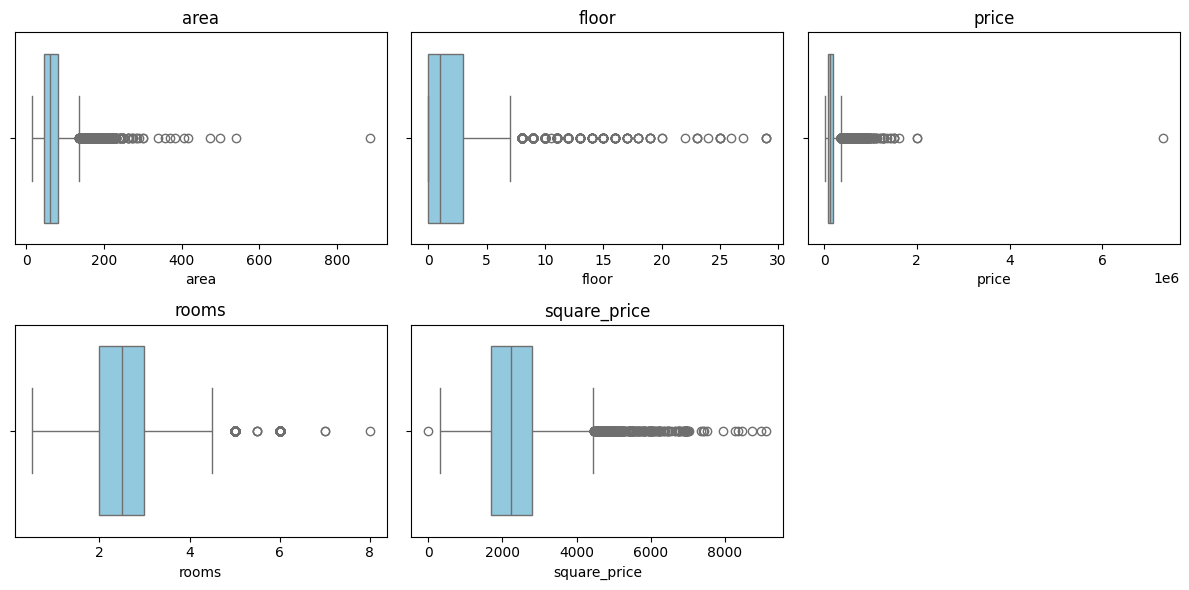

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [94]:
import pandas as pd

df = dataset
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Column: {col}")
    print(f"  Q1 = {Q1:.2f}")
    print(f"  Q3 = {Q3:.2f}")
    print(f"  IQR = {IQR:.2f}")
    print(f"  Lower bound (outlier <) = {lower_bound:.2f}")
    print(f"  Upper bound (outlier >) = {upper_bound:.2f}")
    print(f"  Outliers number: {(df[col] < lower_bound).sum() + (df[col] > upper_bound).sum()}")

Column: area
  Q1 = 45.00
  Q3 = 81.00
  IQR = 36.00
  Lower bound (outlier <) = -9.00
  Upper bound (outlier >) = 135.00
  Outliers number: 446
Column: floor
  Q1 = 0.00
  Q3 = 3.00
  IQR = 3.00
  Lower bound (outlier <) = -4.50
  Upper bound (outlier >) = 7.50
  Outliers number: 418
Column: price
  Q1 = 88320.00
  Q3 = 197000.00
  IQR = 108680.00
  Lower bound (outlier <) = -74700.00
  Upper bound (outlier >) = 360020.00
  Outliers number: 694
Column: rooms
  Q1 = 2.00
  Q3 = 3.00
  IQR = 1.00
  Lower bound (outlier <) = 0.50
  Upper bound (outlier >) = 4.50
  Outliers number: 342
Column: square_price
  Q1 = 1702.75
  Q3 = 2805.25
  IQR = 1102.50
  Lower bound (outlier <) = 49.00
  Upper bound (outlier >) = 4459.00
  Outliers number: 407


In [95]:
# There is a lot of outliers, so lets check if its normal for their neighborhood

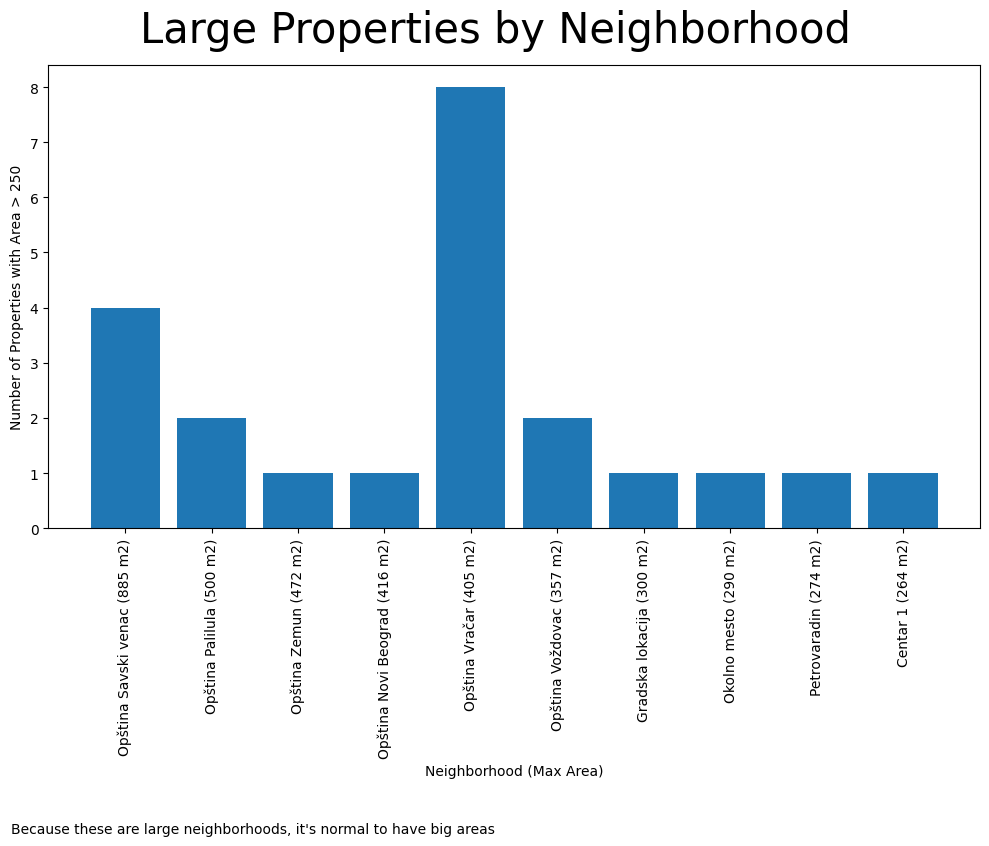

In [114]:
df_filtered = dataset[dataset['area'] > 250]

counts = df_filtered['neighborhood'].value_counts()

max_area = df_filtered.groupby('neighborhood')['area'].max()

combined = pd.DataFrame({
    'count': counts,
    'max_area': max_area
}).sort_values('max_area', ascending=False)

labels = [f"{n} ({int(a)} m2)" for n, a in zip(combined.index, combined['max_area'])]

plt.figure(figsize=(10, 8))
plt.bar(labels, combined['count'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood (Max Area)')
plt.ylabel('Number of Properties with Area > 250')
plt.suptitle('Large Properties by Neighborhood', fontsize=30)
plt.figtext(0.5, -0.05, "Because these are large neighborhoods, it's normal to have big areas",
            wrap=True, horizontalalignment='right', fontsize=10)
plt.tight_layout()
plt.show()

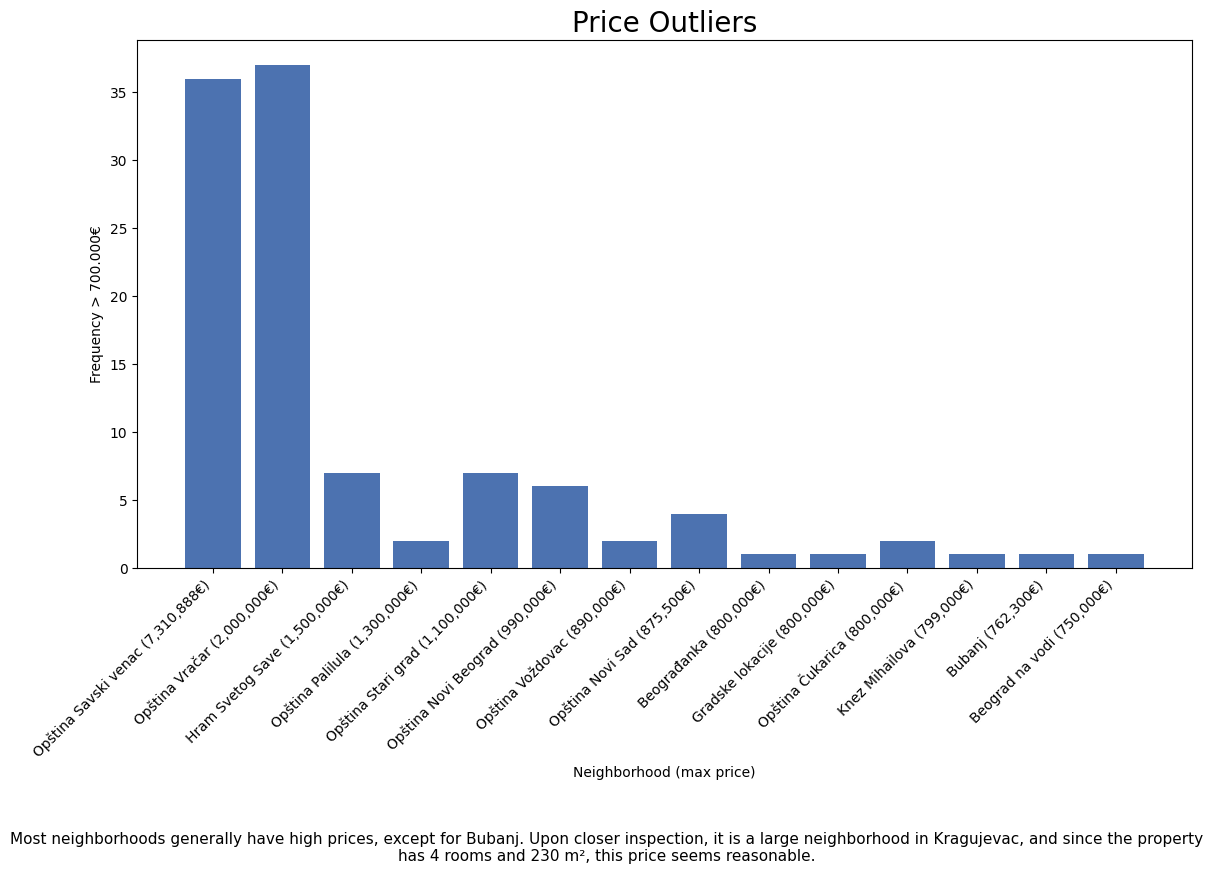

In [146]:
df_filtered = dataset[dataset['price'] > 700000]

counts = df_filtered['neighborhood'].value_counts()

max_price = df_filtered.groupby('neighborhood')['price'].max()

combined = pd.DataFrame({
    'count': counts,
    'max_price': max_price
}).sort_values('max_price', ascending=False)

labels = [f"{n} ({int(p):,}€)" for n, p in zip(combined.index, combined['max_price'])]

plt.figure(figsize=(12,8))
plt.bar(labels, combined['count'], color="#4c72b0")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood (max price)')
plt.ylabel('Frequency > 700.000€')
plt.title('Price Outliers', fontsize=20)

text = ("Most neighborhoods generally have high prices, except for Bubanj. "
        "Upon closer inspection, it is a large neighborhood in Kragujevac, "
        "and since the property has 4 rooms and 230 m², this price seems reasonable.")

plt.figtext(0.5, -0.08, text, wrap=True, horizontalalignment='center', fontsize=11)
plt.tight_layout()
plt.show()

In [141]:
dataset[(dataset['neighborhood'] == 'Bubanj') & (dataset['rooms'] > 2)]

,area,city,floor,price,rooms,square_price,municipality,neighborhood
11208,82,Kragujevac,3.0,137000,3.5,3044,Bubanj,Bubanj
11686,231,Kragujevac,8.0,762300,4.0,3300,Bubanj,Bubanj
11688,66,Kragujevac,4.0,106768,3.0,1618,Bubanj,Bubanj
11689,112,Kragujevac,8.0,197120,4.0,1760,Bubanj,Bubanj


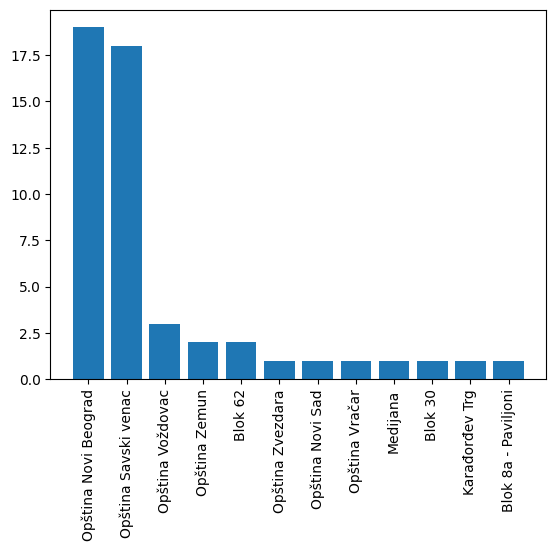

In [159]:
counts = dataset[dataset['floor'] > 15]['neighborhood'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation= 90)
plt.show()

In [161]:
dataset[dataset['neighborhood'] == 'Pregrevica']['area'].describe()

count     3.000000
mean     63.333333
std      14.047538
min      50.000000
25%      56.000000
50%      62.000000
75%      70.000000
max      78.000000
Name: area, dtype: float64